In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 42.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=d1f525281e42003a870b1d42e5ce7a4e6e8ebe1d49078e59ee633cb62180b4df
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("bfi.csv")
df.columns

Index(['rownames', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2',
       'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [ ]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [ ]:
# Dropping missing values rows
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  2436 non-null   int64  
 1   A1        2436 non-null   float64
 2   A2        2436 non-null   float64
 3   A3        2436 non-null   float64
 4   A4        2436 non-null   float64
 5   A5        2436 non-null   float64
 6   C1        2436 non-null   float64
 7   C2        2436 non-null   float64
 8   C3        2436 non-null   float64
 9   C4        2436 non-null   float64
 10  C5        2436 non-null   float64
 11  E1        2436 non-null   float64
 12  E2        2436 non-null   float64
 13  E3        2436 non-null   float64
 14  E4        2436 non-null   float64
 15  E5        2436 non-null   float64
 16  N1        2436 non-null   float64
 17  N2        2436 non-null   float64
 18  N3        2436 non-null   float64
 19  N4        2436 non-null   float64
 20  N5        2436 non-null   floa

In [ ]:
df.head()

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

Bartlett’s Test
Kaiser-Meyer-Olkin Test
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18184.30630782077, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8483267027192372

The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [22]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)
#fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
#eigen_values, vectors = fa.get_eigenvalues()
ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

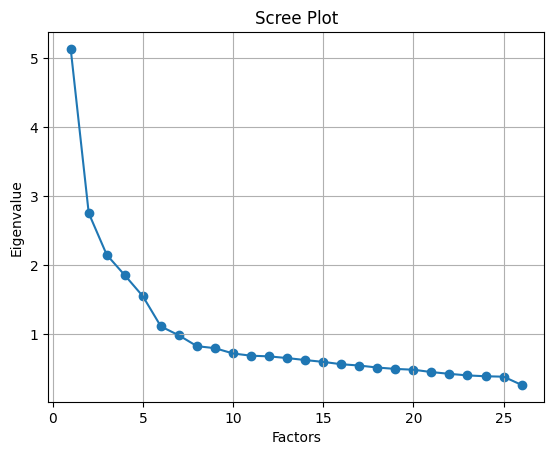

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [23]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(df)
#fa.analyze(df, 6, rotation="varimax")
loadings = fa.loadings_
loadings

array([[-0.02290301, -0.03247244,  0.03316871, -0.03809335,  0.00379506,
         0.10374847],
       [ 0.09939617,  0.06047378,  0.02669442, -0.53078469, -0.12030936,
         0.16363838],
       [ 0.03176731,  0.259875  ,  0.1402256 ,  0.64656947,  0.05577021,
        -0.09704963],
       [-0.00525556,  0.40884857,  0.10953353,  0.58700379,  0.01618433,
         0.03914857],
       [-0.07926603,  0.25534237,  0.22930808,  0.39176034, -0.13629257,
         0.03340065],
       [-0.14364476,  0.4910488 ,  0.0856494 ,  0.45108989,  0.00911122,
         0.10588827],
       [ 0.00562295,  0.12364715,  0.54015018,  0.00422137,  0.18345833,
         0.13879815],
       [ 0.08435816,  0.10650466,  0.65249593,  0.05653766,  0.0792028 ,
         0.20858043],
       [-0.03394649,  0.0497959 ,  0.54587749,  0.10028627, -0.0123717 ,
         0.05447959],
       [ 0.23161662,  0.0089893 , -0.67278538, -0.08998026, -0.15345088,
         0.226977  ],
       [ 0.29340234, -0.1436436 , -0.55970426, -0.

In [25]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer(5,rotation="varimax")
fa.fit(df)
fa.loadings_

array([[-0.01924556, -0.06170286,  0.03486479, -0.01867751,  0.0143449 ],
       [ 0.1064546 ,  0.0307053 ,  0.02756748, -0.42961248, -0.07413314],
       [ 0.02869339,  0.22712712,  0.14115892,  0.62180104,  0.0641174 ],
       [ 0.0053354 ,  0.32992706,  0.11592822,  0.64285597,  0.06164725],
       [-0.06944324,  0.2092169 ,  0.23541803,  0.43124101, -0.10864741],
       [-0.12900241,  0.39769001,  0.09790092,  0.52815947,  0.0753634 ],
       [ 0.00954751,  0.04829695,  0.54827569,  0.04119434,  0.21216878],
       [ 0.08997526,  0.01445863,  0.65030388,  0.10569283,  0.11658219],
       [-0.03024319,  0.01082522,  0.55578126,  0.11416497, -0.00481157],
       [ 0.24079401, -0.03932582, -0.63357583, -0.04146169, -0.1096952 ],
       [ 0.29433007, -0.15417946, -0.56699105, -0.04785845,  0.03126425],
       [ 0.05706633, -0.57646013,  0.01718243, -0.08965972, -0.07321838],
       [ 0.2616608 , -0.67156053, -0.12149036, -0.09678776, -0.05968008],
       [ 0.01241719,  0.53305616,  0.0

In [26]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.73610909, 2.42804921, 2.08250384, 1.80050522, 1.54950195]),
 array([0.10523496, 0.09338651, 0.0800963 , 0.0692502 , 0.05959623]),
 array([0.10523496, 0.19862147, 0.27871777, 0.34796798, 0.4075642 ]))